In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from matplotlib import rcParamsf.
import sklearn
from sklearn import decomposition
from sklearn import datasets

%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('dark')

SyntaxError: invalid syntax (<ipython-input-54-1496c9dc59e1>, line 8)

In [21]:
names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df=pd.read_csv('iris.data.csv',names=names)
df.head()
x=df.iloc[:,0:4]
y=df.iloc[:,4]
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Tukey Method to remove outliers

[]

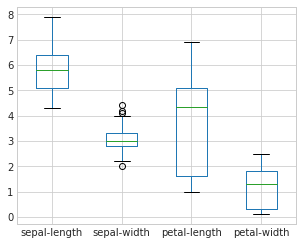

In [20]:
df.boxplot()
plt.plot()

In [29]:
sepal_width=x.iloc[:,1]
iris_outliers=(sepal_width>4)
df[iris_outliers]

,sepal-length,sepal-width,petal-length,petal-width,class
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [40]:
iris_outliers=(sepal_width<2.5)
df[iris_outliers]

,sepal-length,sepal-width,petal-length,petal-width,class
41,4.5,2.3,1.3,0.3,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
60,5.0,2.0,3.5,1.0,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
81,5.5,2.4,3.7,1.0,Iris-versicolor
87,6.3,2.3,4.4,1.3,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor


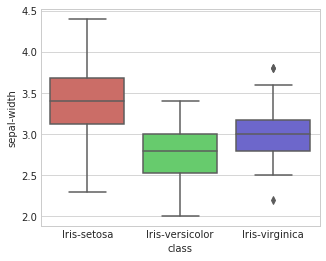

In [36]:
sb.boxplot(x='class',y='sepal-width',data=df,palette='hls')

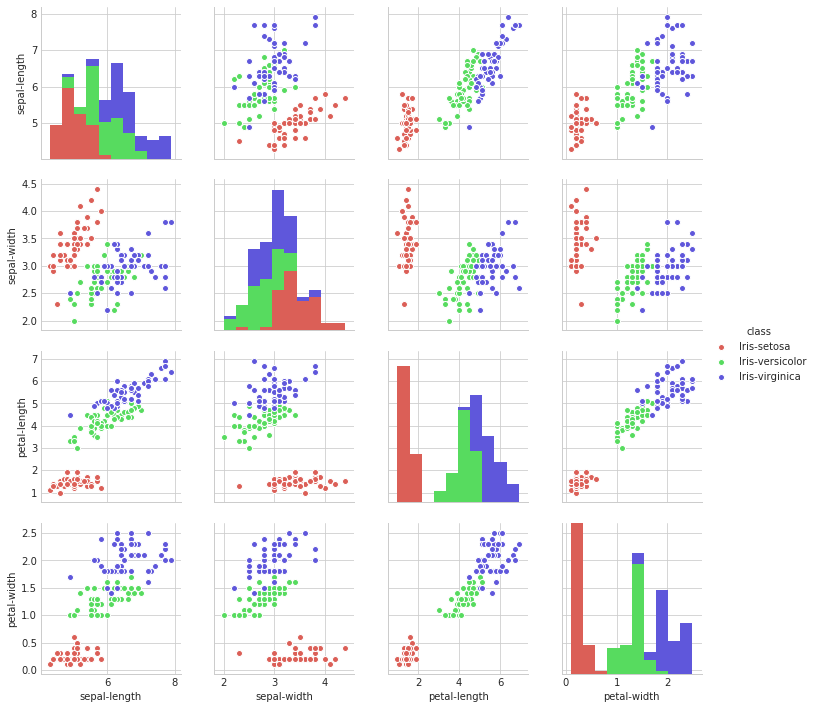

In [38]:
sb.pairplot(df,hue='class',palette='hls')#datapoints will be colored according to the species

# DEBSCAN clustering to model outliers

In [47]:
#DEBSCAN is unsupervised method that clusters core samples(dense areas of dataset)
#and denoted non-core portions (sparse areas of a dataset)
#used to identify collective outliers which shd make upto <5% of the totaldataset(so model parameters are adjusted)
#eps=max dist b/w two clusters to be sampled in the same neighbourhood(start =0.1)
#min_samples=the minimum num ofsamples in the neighbourhood of a point to qualify as a core sample
from sklearn.cluster import DBSCAN
from collections import Counter

In [45]:
data=df.iloc[:,0:4]
target=df.iloc[:,4]
model=DBSCAN(eps=0.8,min_samples=19).fit(data)
print model

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    min_samples=19, n_jobs=1, p=None)


In [49]:
outliers_df=pd.DataFrame(data)    
print Counter(model.labels_)
print outliers_df[model.labels_==-1]

Counter({1: 94, 0: 50, -1: 6})
     sepal-length  sepal-width  petal-length  petal-width
98            5.1          2.5           3.0          1.1
105           7.6          3.0           6.6          2.1
117           7.7          3.8           6.7          2.2
118           7.7          2.6           6.9          2.3
122           7.7          2.8           6.7          2.0
131           7.9          3.8           6.4          2.0


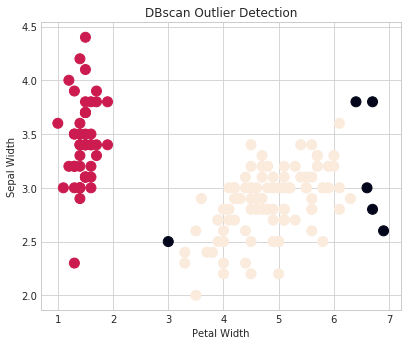

In [59]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
colors=model.labels_
ax.scatter(data.iloc[:,2],data.iloc[:,1],c=colors,s=100)
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Width')
plt.title('DBscan Outlier Detection')